In [1]:
from random import randint
import math
import numpy as np
import matplotlib.pyplot as plt

### Distancia Euclidiana

In [2]:
def euclidean_distance(a,b):
    distance = math.sqrt(((a[0]-b[0])**2)+((a[1]-b[1])**2))
    return distance

### Datos

#### Opción 1: Datos fijos

In [3]:
n_obs = 10
n_atr = 2

val_min = 0
val_max = 10

dataPoints = np.array([[6,1],[5,2],[5,3],[6,3],[7,2],[2,4],[1,5],[1,6],[2,6],[3,5],[3,6]])

#### Opción 2: Datos aleatorios

In [55]:
n_obs = 40
n_atr = 2

val_min = 0
val_max = 10

dataPoints = np.random.randint(val_min, val_max,(n_obs,n_atr))
#dataPoints = randint(val_min, val_max,(n_obs,n_atr))

In [56]:
dataPoints.shape

(40, 2)

In [57]:
dataPoints

array([[2, 3],
       [7, 0],
       [3, 2],
       [9, 8],
       [9, 1],
       [0, 1],
       [3, 3],
       [5, 6],
       [7, 1],
       [0, 2],
       [7, 3],
       [8, 6],
       [2, 7],
       [7, 6],
       [6, 9],
       [3, 5],
       [8, 6],
       [4, 8],
       [2, 1],
       [1, 6],
       [1, 9],
       [4, 2],
       [4, 2],
       [3, 5],
       [5, 5],
       [6, 6],
       [6, 5],
       [6, 7],
       [7, 0],
       [2, 4],
       [2, 6],
       [8, 2],
       [2, 1],
       [6, 4],
       [6, 4],
       [7, 8],
       [9, 6],
       [9, 3],
       [1, 1],
       [9, 1]])

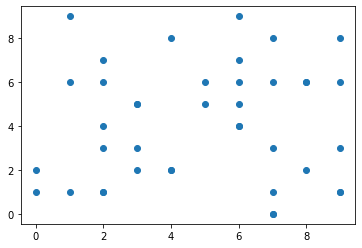

In [58]:
plt.scatter(dataPoints[:, 0], dataPoints[:, 1])
plt.show()

### Paso 1: Inicializar de K Centroides

En este caso la inicialización es aleatoria dentro del intervalo de variación de los datos.

In [59]:
iteraciones = 0

k = 2

centroids = []

for i in range(k):
    x1 = randint(val_min,val_max)
    x2 = randint(val_min,val_max)
    centroids.append((x1,x2))

centroids = np.array(centroids)

print("Centroides: ",
      centroids)

Centroides:  [[10  6]
 [ 7  6]]


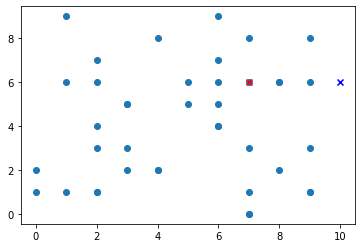

In [61]:
color = ['b','r']
plt.scatter(dataPoints[:, 0], dataPoints[:, 1])
for i in range (len(centroids)):
    plt.scatter(centroids[i, 0], centroids[i, 1],marker='x',c=color[i])
plt.show()

### Paso 2: Asignar cada observación a un clúster de acuerdo al centroide más cercano

In [62]:
clusters = []
n_obs, n_atr = dataPoints.shape

iteraciones = iteraciones + 1

for i in range(n_obs):
    point = dataPoints[i,:]
    print("Point: " + str(i) + " located in: " , point)
    distance=[]
    for j in range (len(centroids)):
        distance.append(euclidean_distance(point,centroids[j]))
        print("Distance to centroid: " + str (j) + " is ", distance[j])
    #input("The Distance to each centroid was calculated (Press Enter to continue)")
    #print(np.amin(distance, axis=0))
    d_min = np.amin(distance)
    aux = np.where(distance == d_min)
    c = aux[0][0]
    clusters.append([i,c])
    print("The point " + str(i) + " has been assigned to cluster " + str(c))
    print(" ")

clusters = np.array(clusters)
print(clusters)

Point: 0 located in:  [2 3]
Distance to centroid: 0 is  8.54400374531753
Distance to centroid: 1 is  5.830951894845301
The point 0 has been assigned to cluster 1
 
Point: 1 located in:  [7 0]
Distance to centroid: 0 is  6.708203932499369
Distance to centroid: 1 is  6.0
The point 1 has been assigned to cluster 1
 
Point: 2 located in:  [3 2]
Distance to centroid: 0 is  8.06225774829855
Distance to centroid: 1 is  5.656854249492381
The point 2 has been assigned to cluster 1
 
Point: 3 located in:  [9 8]
Distance to centroid: 0 is  2.23606797749979
Distance to centroid: 1 is  2.8284271247461903
The point 3 has been assigned to cluster 0
 
Point: 4 located in:  [9 1]
Distance to centroid: 0 is  5.0990195135927845
Distance to centroid: 1 is  5.385164807134504
The point 4 has been assigned to cluster 0
 
Point: 5 located in:  [0 1]
Distance to centroid: 0 is  11.180339887498949
Distance to centroid: 1 is  8.602325267042627
The point 5 has been assigned to cluster 1
 
Point: 6 located in:  [3

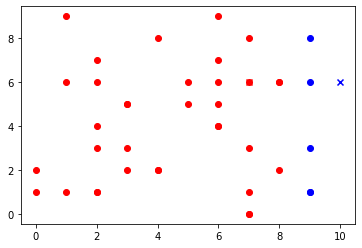

In [63]:
color = ['b','r']
for i in range (len(dataPoints)):
    plt.scatter(dataPoints[i, 0], dataPoints[i, 1], marker='o', c = color[clusters[i,1]])
for i in range (len(centroids)):
    plt.scatter(centroids[i, 0], centroids[i, 1],marker='x',c=color[i])
plt.show()

### Paso 3: Calcular los nuevos centroides, sacando el promedio de las observaciones de cada clúster

In [64]:
newCentroids = []
for i in range (k):
    dataCluster = []

    for j in range (len(dataPoints)):
        if (clusters[j,1]==i):
            dataCluster.append(dataPoints[j,:])
    #print(dataCluster)
    dataCluster = np.array(dataCluster)
    newCentroids.append(np.mean(dataCluster, axis=0))

newCentroids = np.array(newCentroids)
print(newCentroids)

[[9.         3.8       ]
 [4.31428571 4.17142857]]


### Paso 4: Evaluar si se ha logrado la convergencia (los centroides no se han movido)

In [66]:
oldCentroids = centroids.copy()
difCentroids = []
epsilon = 0

for i in range (k):
    difCentroids.append(euclidean_distance(oldCentroids[i],newCentroids[i]))

dif_max = np.amax(difCentroids)

print("Difference is: ", dif_max)

if ( -epsilon <= dif_max <= epsilon):
    print("KMEANS HAS ENDED AFTER " + str(iteraciones) + " ITERATIONS")
    centroids = newCentroids.copy()
    print("Final centroids are: ", centroids)
else:
    centroids = newCentroids.copy()
    print("NEED TO MAKE ANOTHER ITERATION ")

Difference is:  0.0
KMEANS HAS ENDED AFTER 1 ITERATIONS
Final centroids are:  [[9.         3.8       ]
 [4.31428571 4.17142857]]


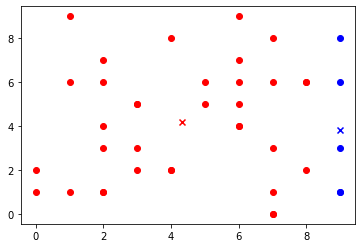

In [67]:
color = ['b','r']
for i in range (len(dataPoints)):
    plt.scatter(dataPoints[i, 0], dataPoints[i, 1], marker='o', c = color[clusters[i,1]])
for i in range (len(centroids)):
    plt.scatter(centroids[i, 0], centroids[i, 1],marker='x',c=color[i])
plt.show()

In [68]:
from sklearn.cluster import KMeans

In [69]:
kmeans = KMeans(n_clusters=k, random_state=0, verbose=1).fit(dataPoints)
print(kmeans.cluster_centers_)

Initialization complete
Iteration 0, inertia 361.0
Iteration 1, inertia 328.82864450127875
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 423.0
Iteration 1, inertia 377.05
Iteration 2, inertia 341.15271111111105
Iteration 3, inertia 328.82864450127875
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 405.0
Iteration 1, inertia 372.9071354940302
Iteration 2, inertia 351.69909275841997
Iteration 3, inertia 332.76500000000004
Iteration 4, inertia 329.52020202020196
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 586.0
Iteration 1, inertia 389.38671986320884
Iteration 2, inertia 372.9071354940302
Iteration 3, inertia 351.69909275841997
Iteration 4, inertia 332.76500000000004
Iteration 5, inertia 329.52020202020196
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 521.0
Iteration 1, inertia 391.0022222222224
Iteration 2, ine

In [70]:
c = kmeans.cluster_centers_
print(c)

[[2.05882353 3.52941176]
 [7.         4.56521739]]


In [71]:
kmeans.labels_

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

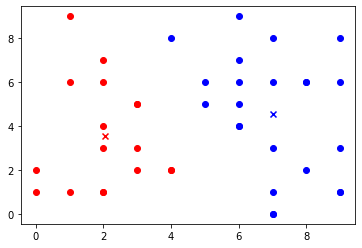

In [72]:
color = ['r','b']
for i in range (len(dataPoints)):
    plt.scatter(dataPoints[i, 0], dataPoints[i, 1], marker='o', c = color[kmeans.labels_[i]])
for i in range (len(c)):
    plt.scatter(c[i, 0], c[i, 1],marker='x',c=color[i])
plt.show()